In [ ]:
import random

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import numpy as np
import re 
import time

from wordcloud import WordCloud, ImageColorGenerator

%matplotlib inline

In [ ]:
from tqdm.auto import tqdm
tqdm.pandas()

In [ ]:
path = "Cleaned_Suicide_Detection.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

,text,class,token_number
0,ex wife threaten suiciderecently leave wife go...,suicide,54.0
1,weird don affect compliment s come know irl fe...,non-suicide,12.0
2,finally hear bad year swear fuck god s annoying,non-suicide,9.0
3,need helpjust help m cry hard,suicide,6.0
4,m losthello ve struggle year m afraid past yea...,suicide,196.0


In [ ]:
df= df['text']

In [ ]:
df.fillna('', inplace=True)

In [ ]:
text = " ".join(text for text in df)
text = text.split()
text = [i for i in text if i != '&amp;']
text = [i for i in text if 'http' not in i]
text = ' '.join([str(i) for i in text])

In [ ]:
from wordcloud import STOPWORDS

In [ ]:
wcloud = WordCloud(collocations=False,
                    background_color='white', 
                    stopwords= STOPWORDS.update(["https", "co", "RT","didn","don","ve","doesn","etc","amp","gt","med","ye","ur","aren"]), 
                    colormap='gist_gray',
                    width=1080,
                    height=1080,
                    prefer_horizontal = 0.8,
                    min_font_size = 4,
                    max_words = 600,
                    repeat=True
                  ).generate(text)

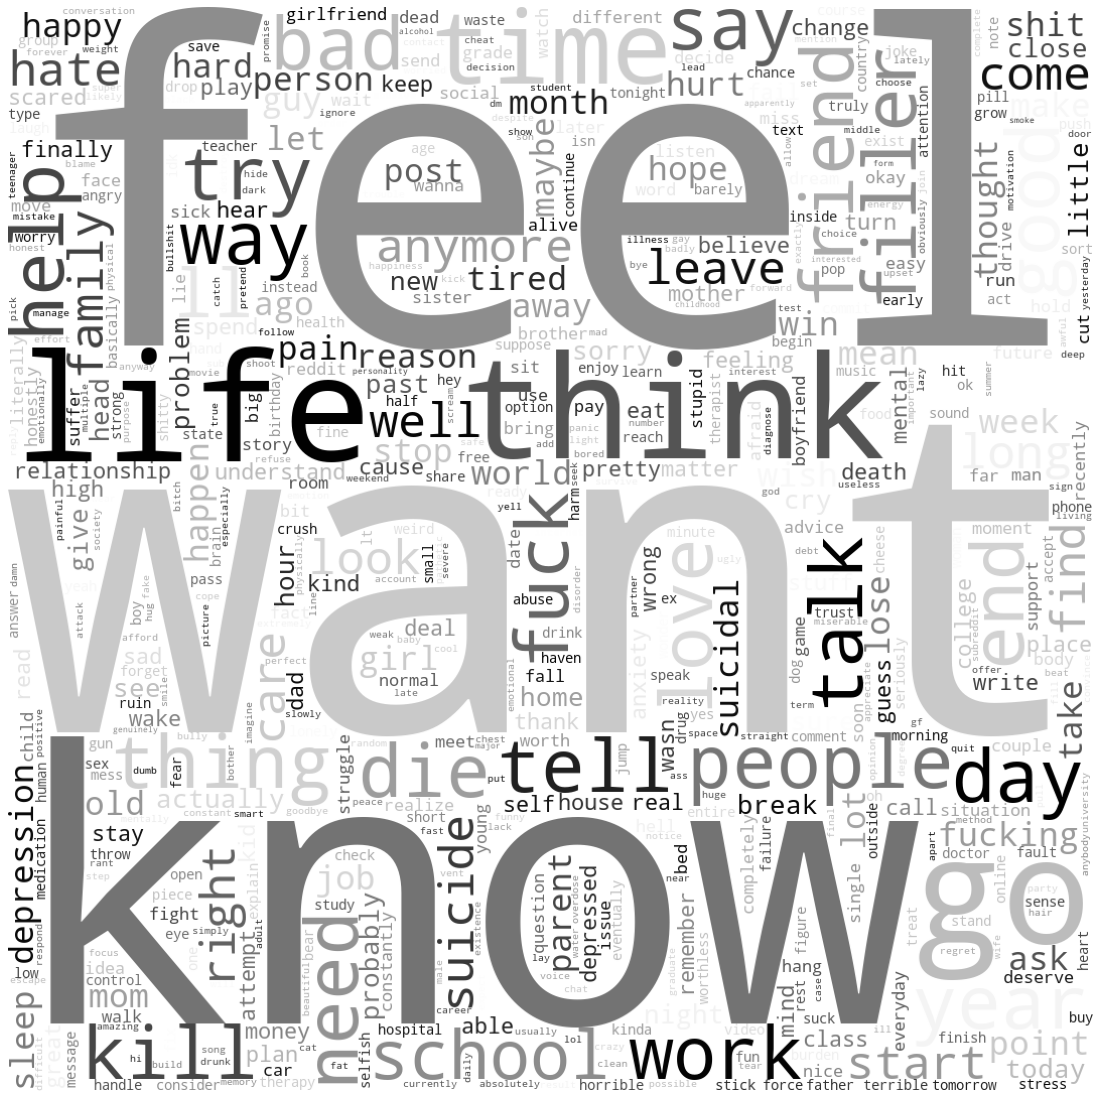

In [ ]:
plt.figure(figsize=[20, 20])
plt.imshow(wcloud, interpolation=None)
plt.axis("off")
plt.show()

In [ ]:
import re
tokens = re.findall('\w+',text)
tokens[:10]

['ex',
 'wife',
 'threaten',
 'suiciderecently',
 'leave',
 'wife',
 'good',
 'cheat',
 'twice',
 'lie']

In [ ]:
import nltk
nltk.download ('stopwords')
sw=nltk.corpus.stopwords.words('english')
sw[:5]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we']

In [ ]:
words_ns=[]
for tokens in tokens:
  if tokens not in sw:
    words_ns.append(tokens)

words_ns[:5]

['ex', 'wife', 'threaten', 'suiciderecently', 'leave']

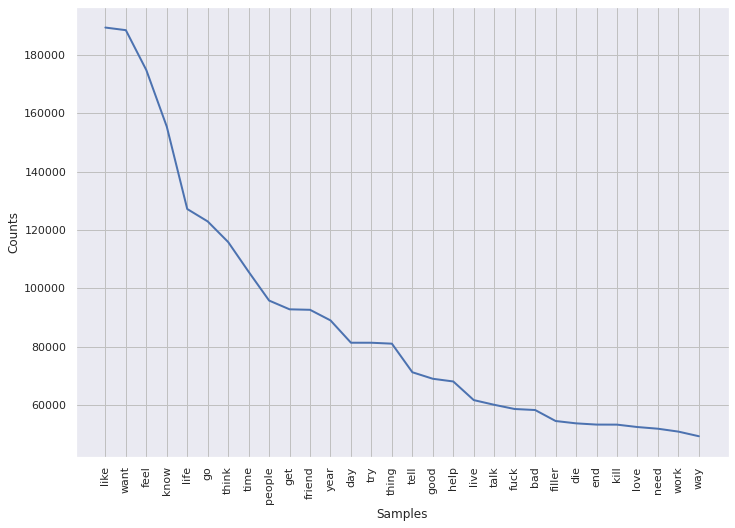

In [37]:
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('darkgrid')
nlp_words=nltk.FreqDist(words_ns)
nlp_words.plot(30)